IMPORTATION DES LIBRAIRIES DE BASES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importation des fonctions
from attrition_utils import*

IMPORTATION ET APERCU DU JEU DE DONNEES

In [3]:
df = importer_affichage_dataset('Donnees.xlsx')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


STRUCTURE DE LA BASE DE DONNEES

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

Nous avons 1470 observations dans la base;
Pas de valeurs manquantes;
La base de données a 32 variables

Nous constatons que nous avons 24 variables de type entier et 8 variables de type catégoriel

In [5]:
dict_data = pd.read_excel('dict_data.xlsx')
dict_data

,Variable,Description,Type
0,Age,Age,Numeric
1,Attrition,Attrition,Categorielle
2,BusinessTravel,Fréquence Voyage/Mission,Numeric
3,DailyRate,Durée journalière au travail,Numeric
4,Department,Departement,Categorielle
5,DistanceFromHome,Distance de la maison au Travail,Numeric
6,Education,Niveau d'éducation,Categorielle
7,EducationField,Filière,Categorielle
8,EmployeeNumber,Matricule,Categorielle
9,EnvironmentSatisfaction,Niveau d'appreciation/satisfaction de l'enviro...,Categorielle


RESUME STATISTIQUE

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


CATEGORISATION DES VARIABLES POUR ANALYSES

In [7]:
categorical_variables(df)

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [8]:
# cat_vars = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
cat_vars = categorical_variables(df)
cat_vars.pop(0)
cat_vars

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [9]:
num_vars = numerical_variables(df)
num_vars

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [10]:
""" numeric_box = select_numeric_columns_box(df)
numeric_box.head() """

' numeric_box = select_numeric_columns_box(df)\nnumeric_box.head() '

In [11]:
numeric_corr = select_numeric_columns_corr(df)
numeric_corr.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2


STATISTIQUES UNIVARIEES

Tableau de comptage des valeurs avec pourcentages pour la variable 'Attrition':

           Comptage  Pourcentage (%)
Attrition                           
No             1233            83.88
Yes             237            16.12




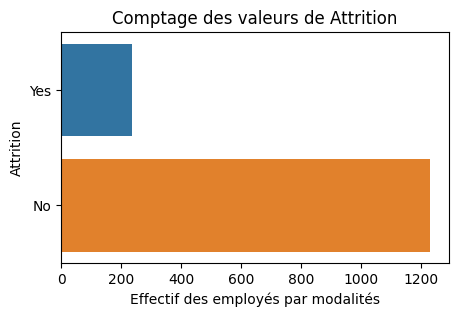

Tableau de comptage des valeurs avec pourcentages pour la variable 'BusinessTravel':

                   Comptage  Pourcentage (%)
BusinessTravel                              
Travel_Rarely          1043            70.95
Travel_Frequently       277            18.84
Non-Travel              150            10.20




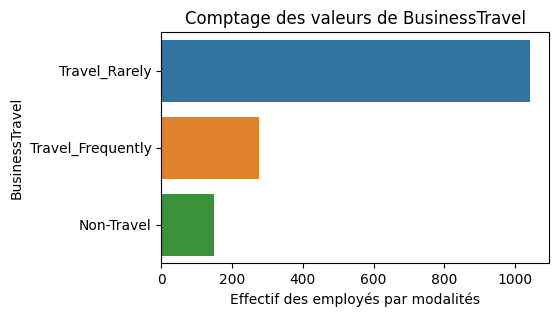

Tableau de comptage des valeurs avec pourcentages pour la variable 'Department':

                        Comptage  Pourcentage (%)
Department                                       
Research & Development       961            65.37
Sales                        446            30.34
Human Resources               63             4.29




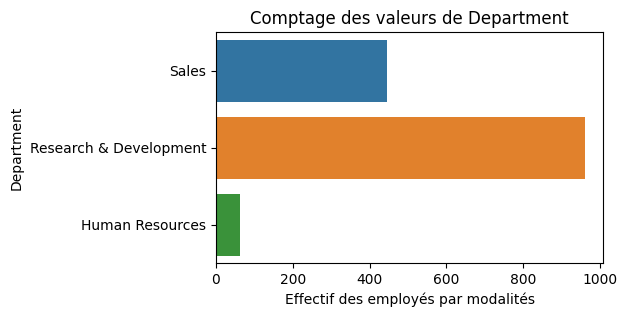

Tableau de comptage des valeurs avec pourcentages pour la variable 'EducationField':

                  Comptage  Pourcentage (%)
EducationField                             
Life Sciences          606            41.22
Medical                464            31.56
Marketing              159            10.82
Technical Degree       132             8.98
Other                   82             5.58
Human Resources         27             1.84




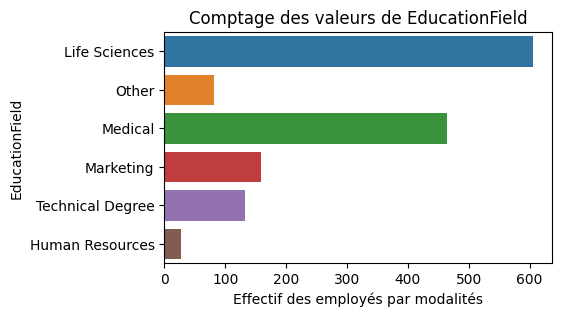

Tableau de comptage des valeurs avec pourcentages pour la variable 'Gender':

        Comptage  Pourcentage (%)
Gender                           
Male         882             60.0
Female       588             40.0




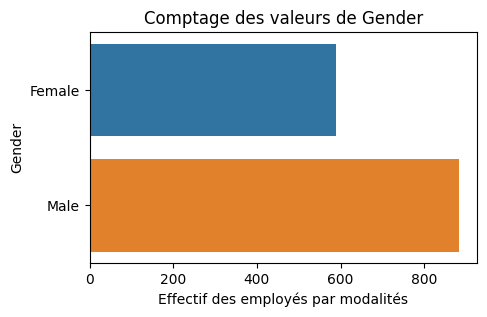

Tableau de comptage des valeurs avec pourcentages pour la variable 'JobRole':

                           Comptage  Pourcentage (%)
JobRole                                             
Sales Executive                 326            22.18
Research Scientist              292            19.86
Laboratory Technician           259            17.62
Manufacturing Director          145             9.86
Healthcare Representative       131             8.91
Manager                         102             6.94
Sales Representative             83             5.65
Research Director                80             5.44
Human Resources                  52             3.54




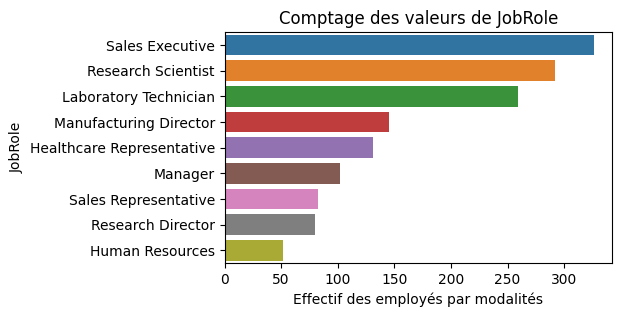

Tableau de comptage des valeurs avec pourcentages pour la variable 'MaritalStatus':

               Comptage  Pourcentage (%)
MaritalStatus                           
Married             673            45.78
Single              470            31.97
Divorced            327            22.24




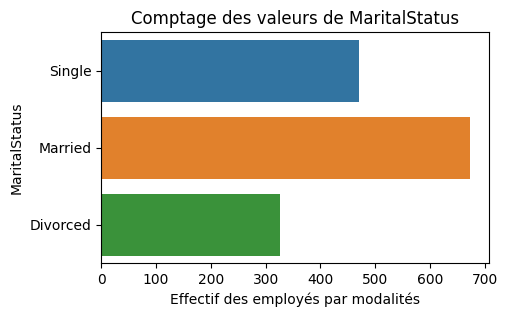

Tableau de comptage des valeurs avec pourcentages pour la variable 'OverTime':

          Comptage  Pourcentage (%)
OverTime                           
No            1054             71.7
Yes            416             28.3




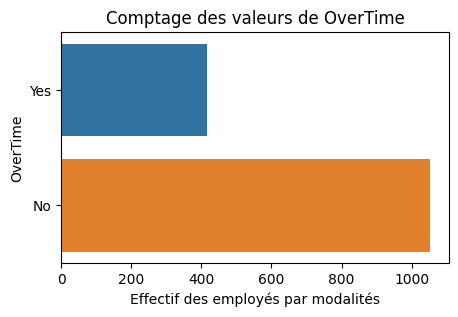

In [12]:
univariate_statistics(df)

STATISTIQUES BIVARIEES VARIABLES CATEGORIELLES ET VARIABLE CIBLE

Tableau de comptage des valeurs avec pourcentages pour la variable 'BusinessTravel':

                   Attrition_Yes  Ratio_Yes  Attrition_No  Ration_No
BusinessTravel                                                      
Travel_Rarely                156      65.82           887      71.94
Travel_Frequently             69      29.11           208      16.87
Non-Travel                    12       5.06           138      11.19




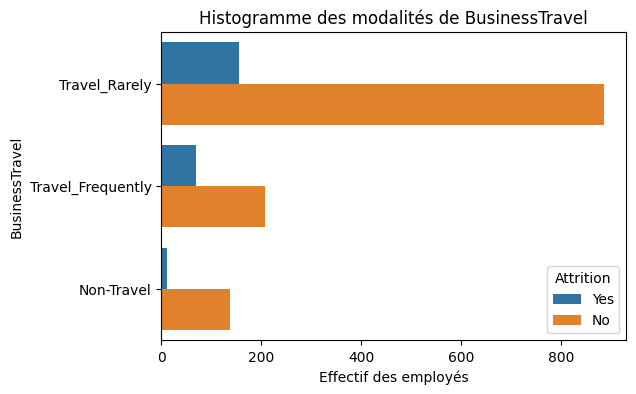

Tableau de comptage des valeurs avec pourcentages pour la variable 'Department':

                        Attrition_Yes  Ratio_Yes  Attrition_No  Ration_No
Department                                                               
Research & Development            133      56.12           828      67.15
Sales                              92      38.82           354      28.71
Human Resources                    12       5.06            51       4.14




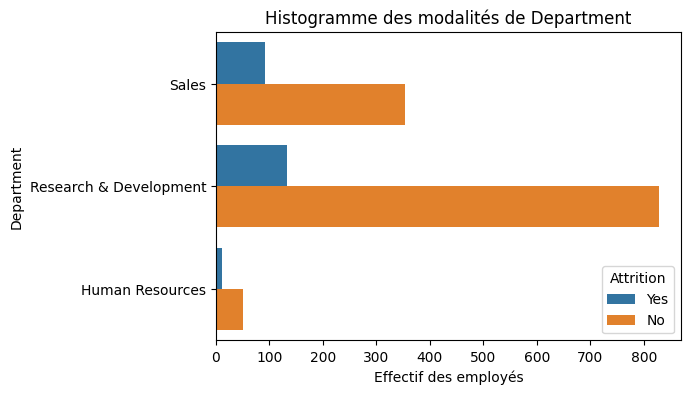

Tableau de comptage des valeurs avec pourcentages pour la variable 'EducationField':

                  Attrition_Yes  Ratio_Yes  Attrition_No  Ration_No
EducationField                                                     
Life Sciences                89      37.55           517      41.93
Medical                      63      26.58           401      32.52
Marketing                    35      14.77           124      10.06
Technical Degree             32      13.50           100       8.11
Other                        11       4.64            71       5.76
Human Resources               7       2.95            20       1.62




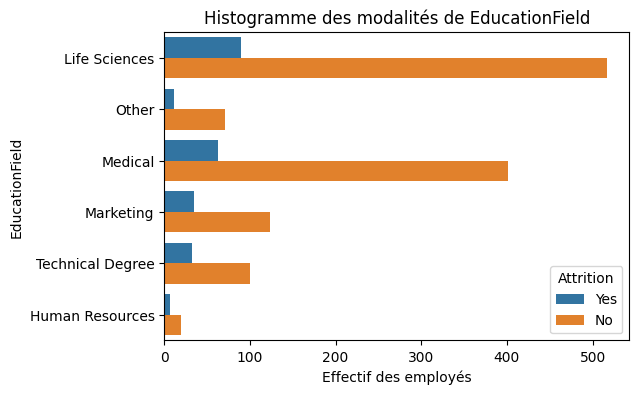

Tableau de comptage des valeurs avec pourcentages pour la variable 'Gender':

        Attrition_Yes  Ratio_Yes  Attrition_No  Ration_No
Gender                                                   
Male              150      63.29           732      59.37
Female             87      36.71           501      40.63




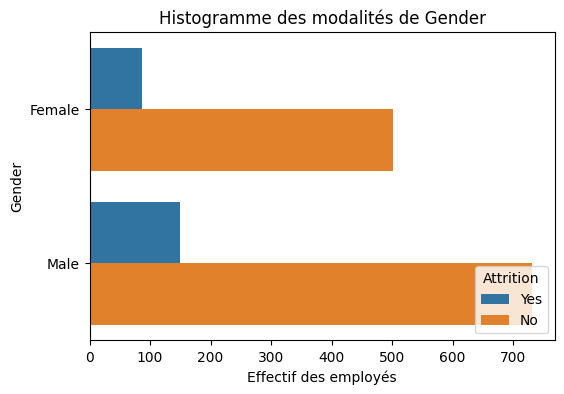

Tableau de comptage des valeurs avec pourcentages pour la variable 'JobRole':

                           Attrition_Yes  Ratio_Yes  Attrition_No  Ration_No
JobRole                                                                     
Laboratory Technician                 62      26.16           197      15.98
Sales Executive                       57      24.05           269      21.82
Research Scientist                    47      19.83           245      19.87
Sales Representative                  33      13.92            50       4.06
Human Resources                       12       5.06            40       3.24
Manufacturing Director                10       4.22           135      10.95
Healthcare Representative              9       3.80           122       9.89
Manager                                5       2.11            97       7.87
Research Director                      2       0.84            78       6.33




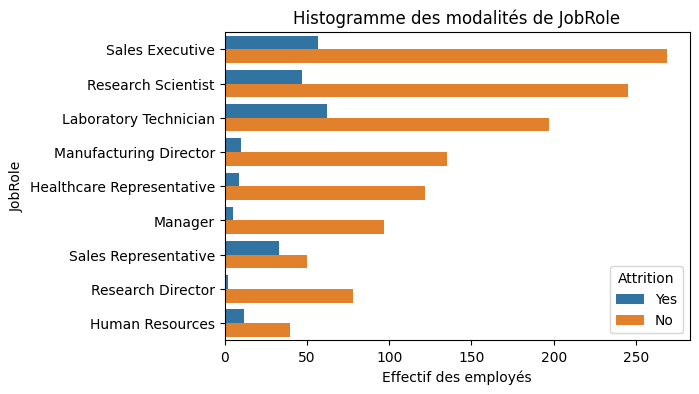

Tableau de comptage des valeurs avec pourcentages pour la variable 'MaritalStatus':

               Attrition_Yes  Ratio_Yes  Attrition_No  Ration_No
MaritalStatus                                                   
Single                   120      50.63           350      28.39
Married                   84      35.44           589      47.77
Divorced                  33      13.92           294      23.84




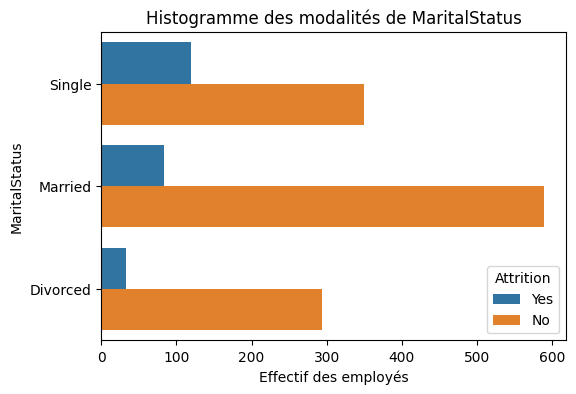

Tableau de comptage des valeurs avec pourcentages pour la variable 'OverTime':

          Attrition_Yes  Ratio_Yes  Attrition_No  Ration_No
OverTime                                                   
Yes                 127      53.59           289      23.44
No                  110      46.41           944      76.56




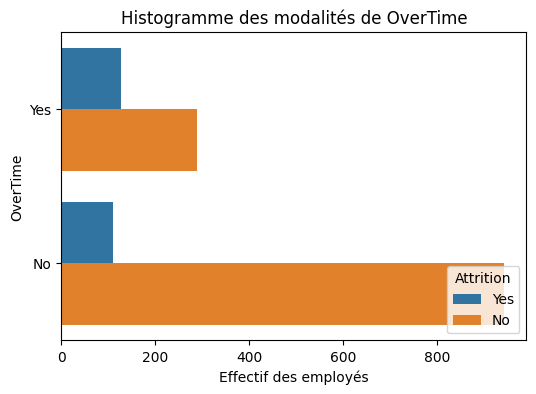

In [13]:
bivariate_statistics(df)

Nous constatons que les employés qui bénéficient très rarement des missions sont plus nombreux et globalement, cela semble ne pas constituer la raison pour laquelle ceux-ci démissionnent. Cependant, pour l'ensemble de l'effectif des employés ayant démissionné, nous observons plus de 65% de ceux ayant démissionné, soit 156 employés, proviennent de la catégorie qui voyagent très rarement.

Plus de la moitié des employés ayant démissionné, soit 56% (133 employés) provient du département "Research & development". De l'effectif restant des démissionnés, soit 104 employés, 88% est issu du département des ventes (92 employés). 

Les employés dont les profils relèvent du Médical et des Sciences de la vie sont ceux qui démissionnent le plus par rapport aux autres. ceux des Sciences de la vie représentent 37.5% du total des employés ayant démissionné et ceux du Médical représentent 26.5%. 

Nous constatons aisément que les employés de sexe masculin sont ceux qui démissionnent le plus. soit un peu plus de 63% de l'ensemble des employés ayant démissionné.

Les heures supplémentaires semblent ne pas influer sur la décision d'un employé de démissionner. Nous observons qu'il y a une quasi équiprobabilité de démission entre les employés ayant effectué les heures supplémentaires et ceux ne l'ayant pas effectué.

STATISTIQUES BIVARIEES VARIABLES NUMERIQUES ET VARIABLE CIBLE

ANALYSE PAR LA MATRICE DES CORRELATIONS

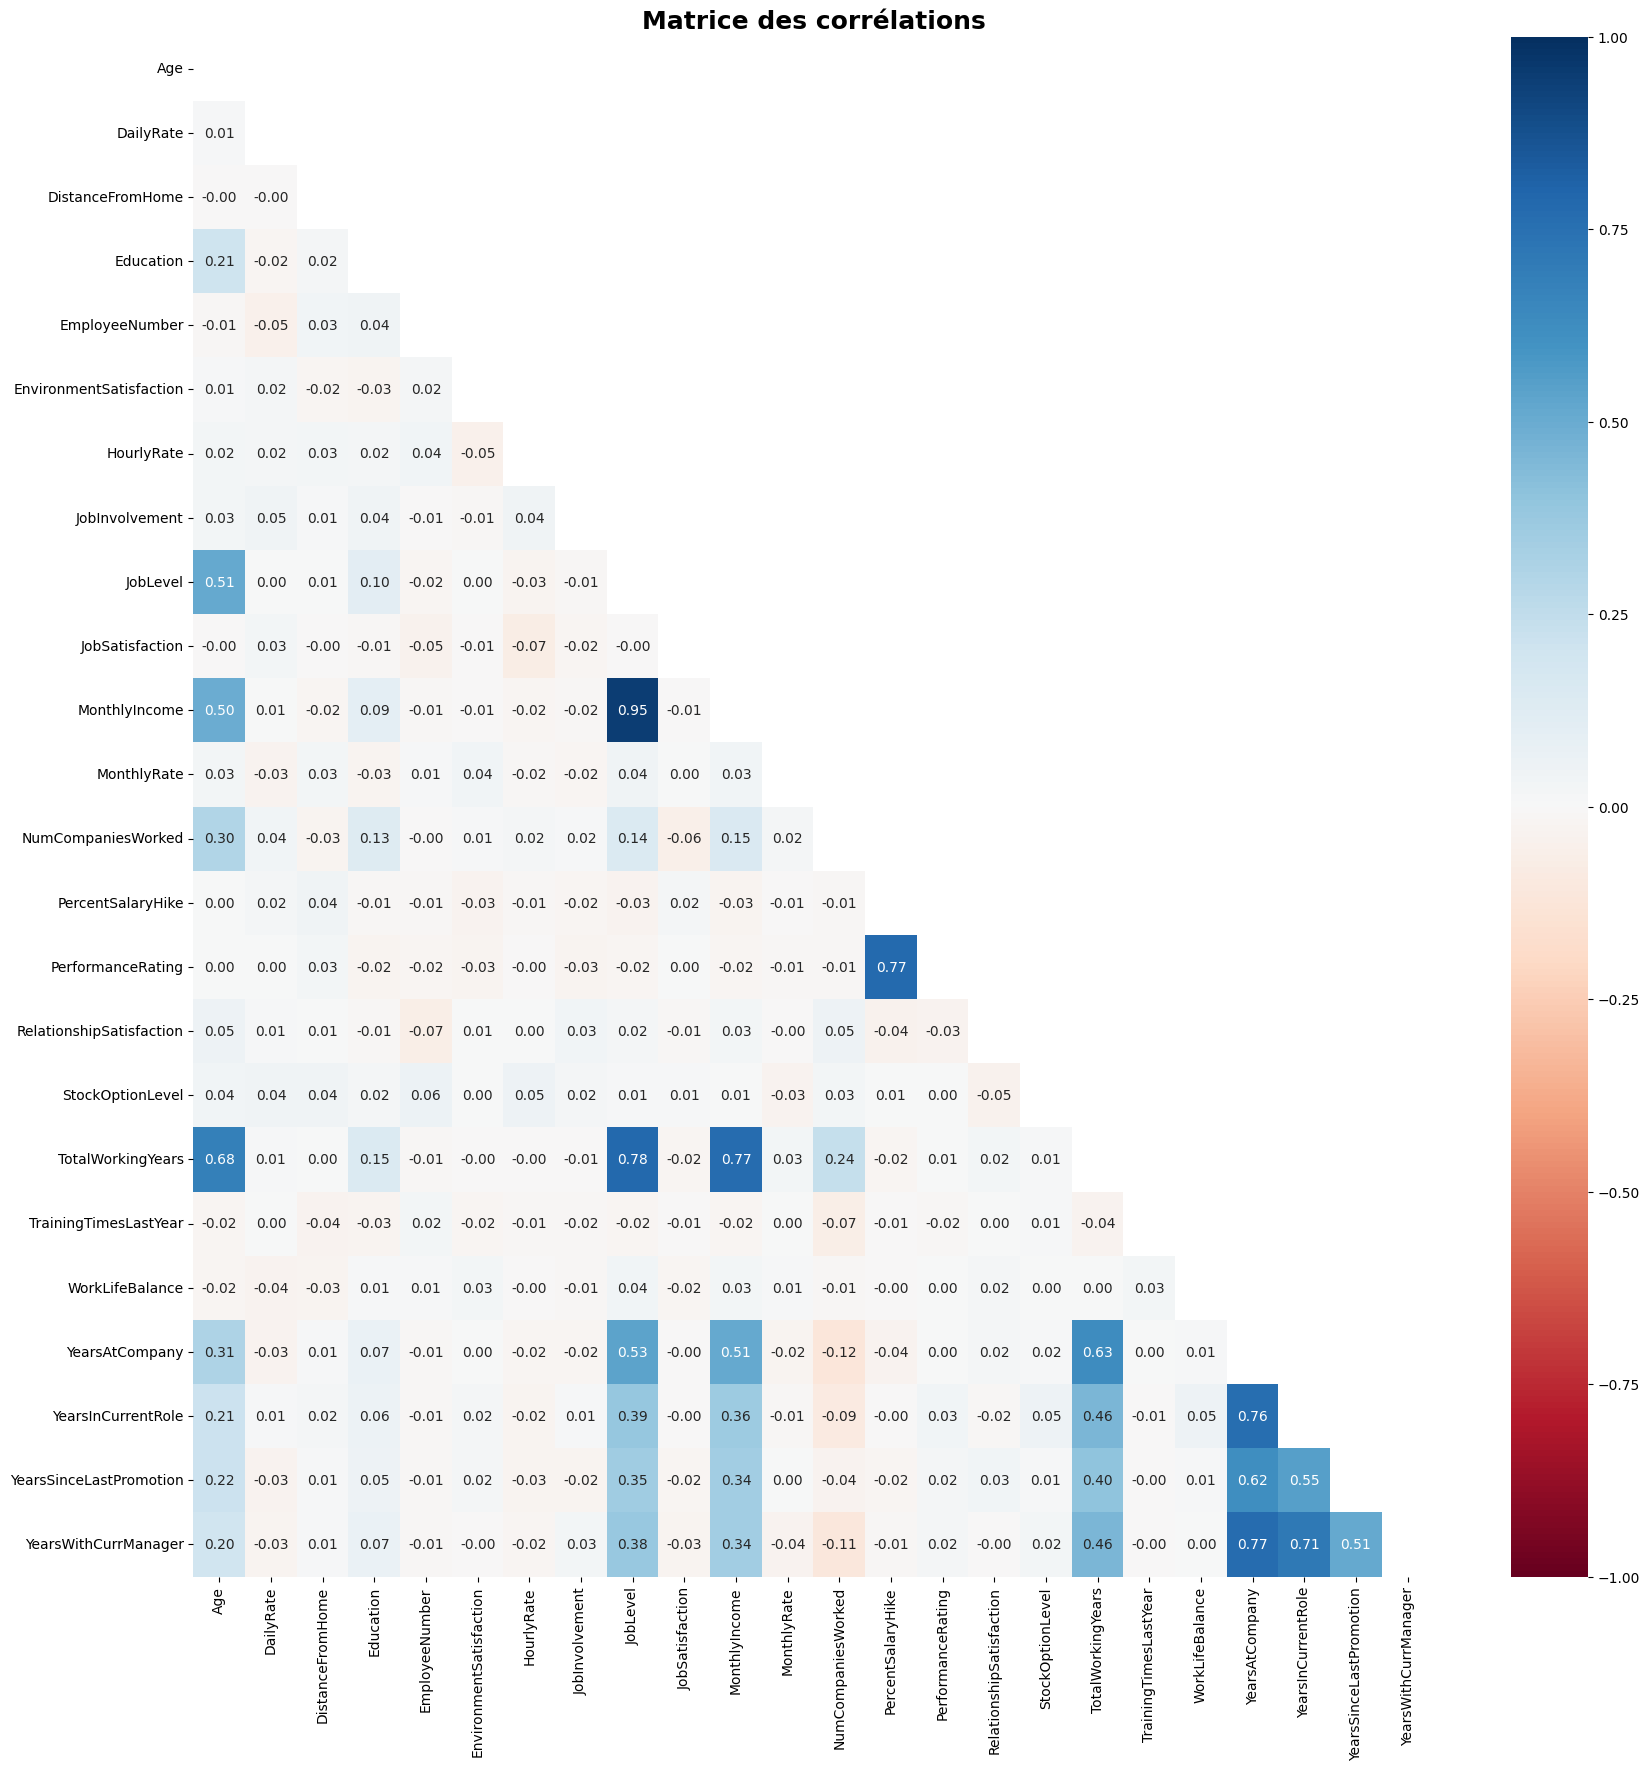

In [14]:
plot_correlation_matrix(numeric_corr)

ANALYSE PAR LES BOXPLOTS

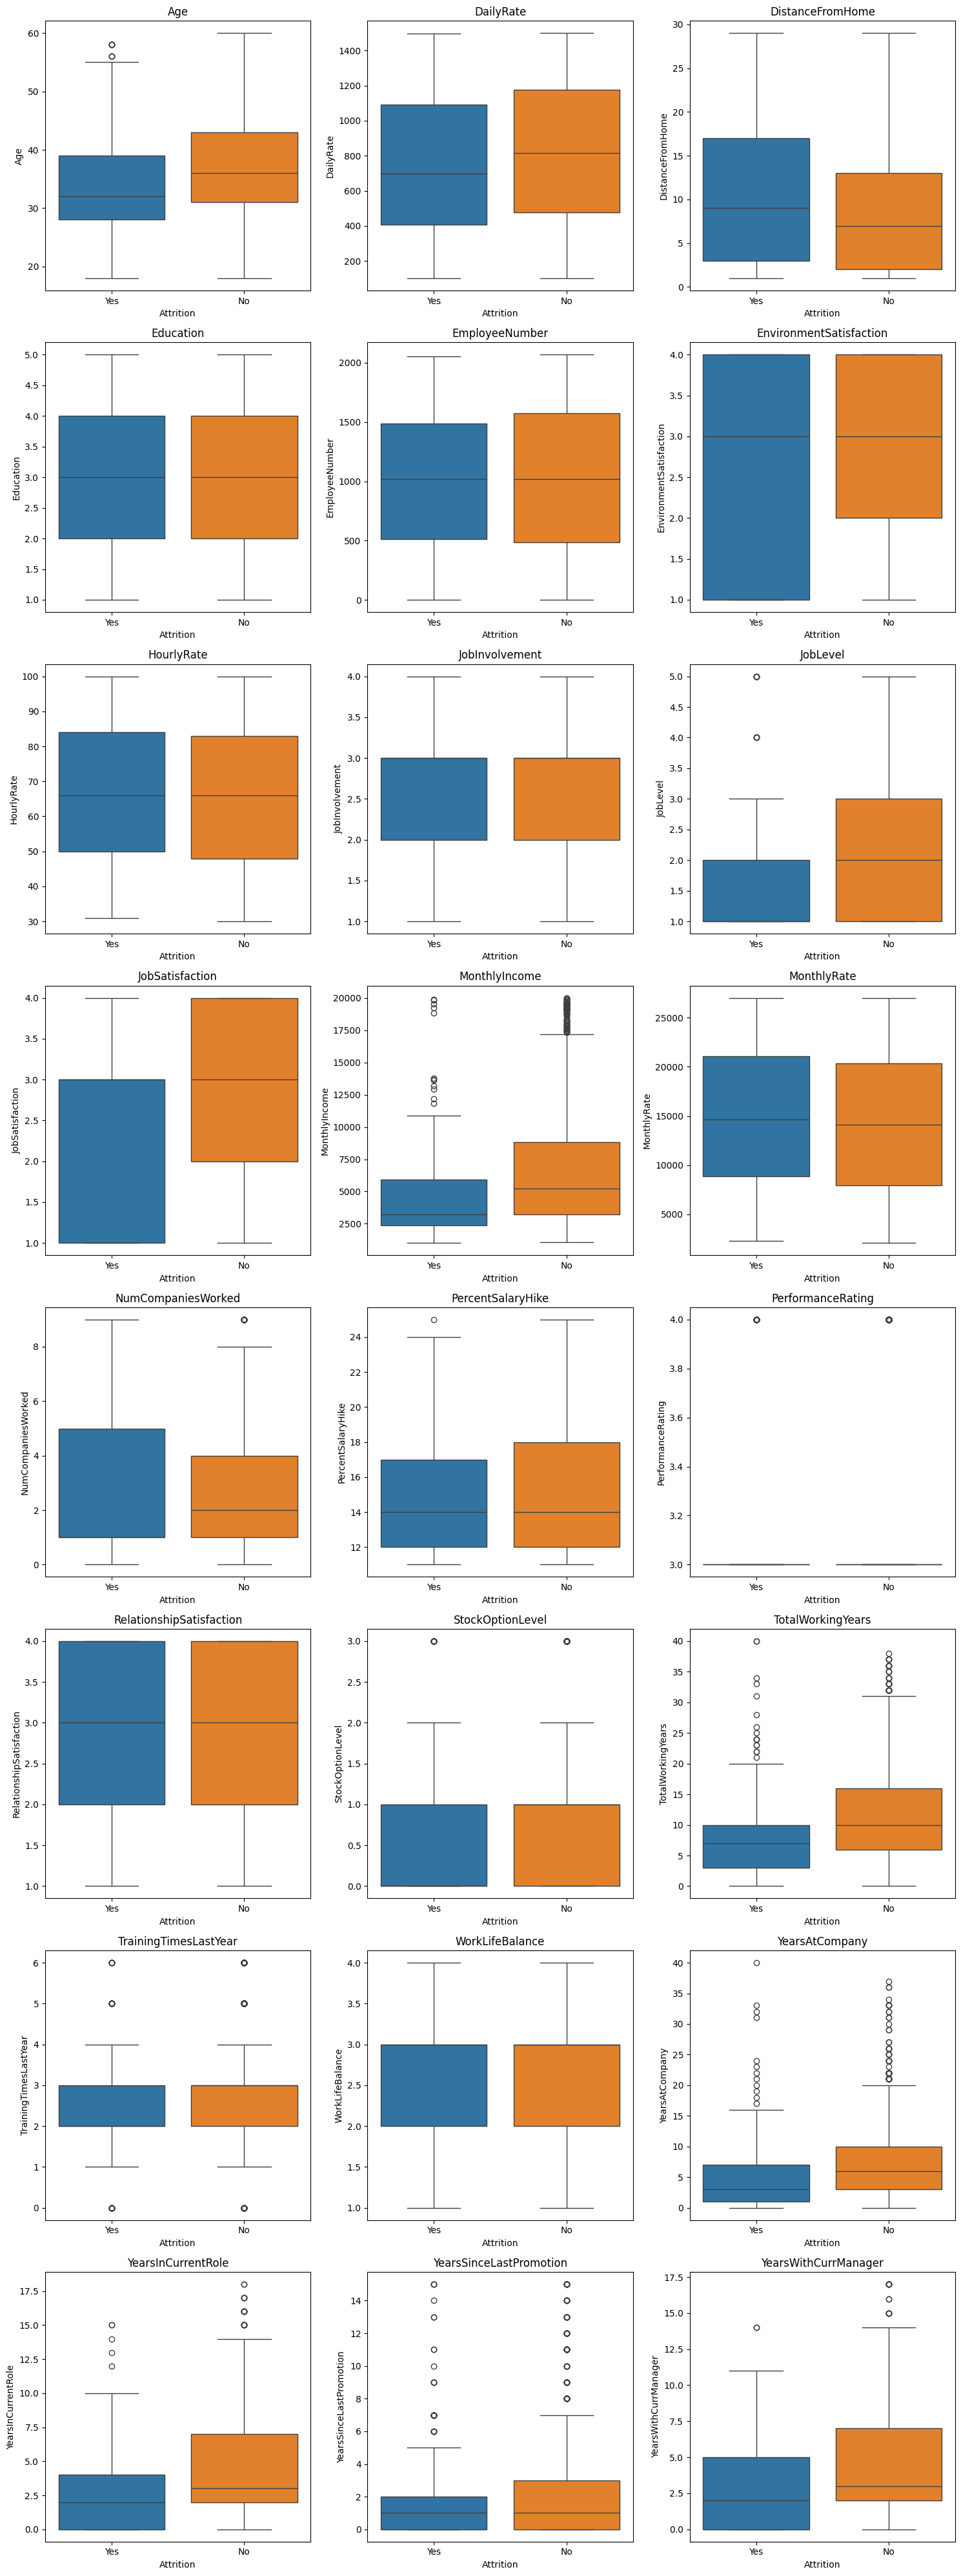

In [15]:
boxplot_numeric_variables(df)

ELIMINATION ET VERIFICATION DES OUTLIERS

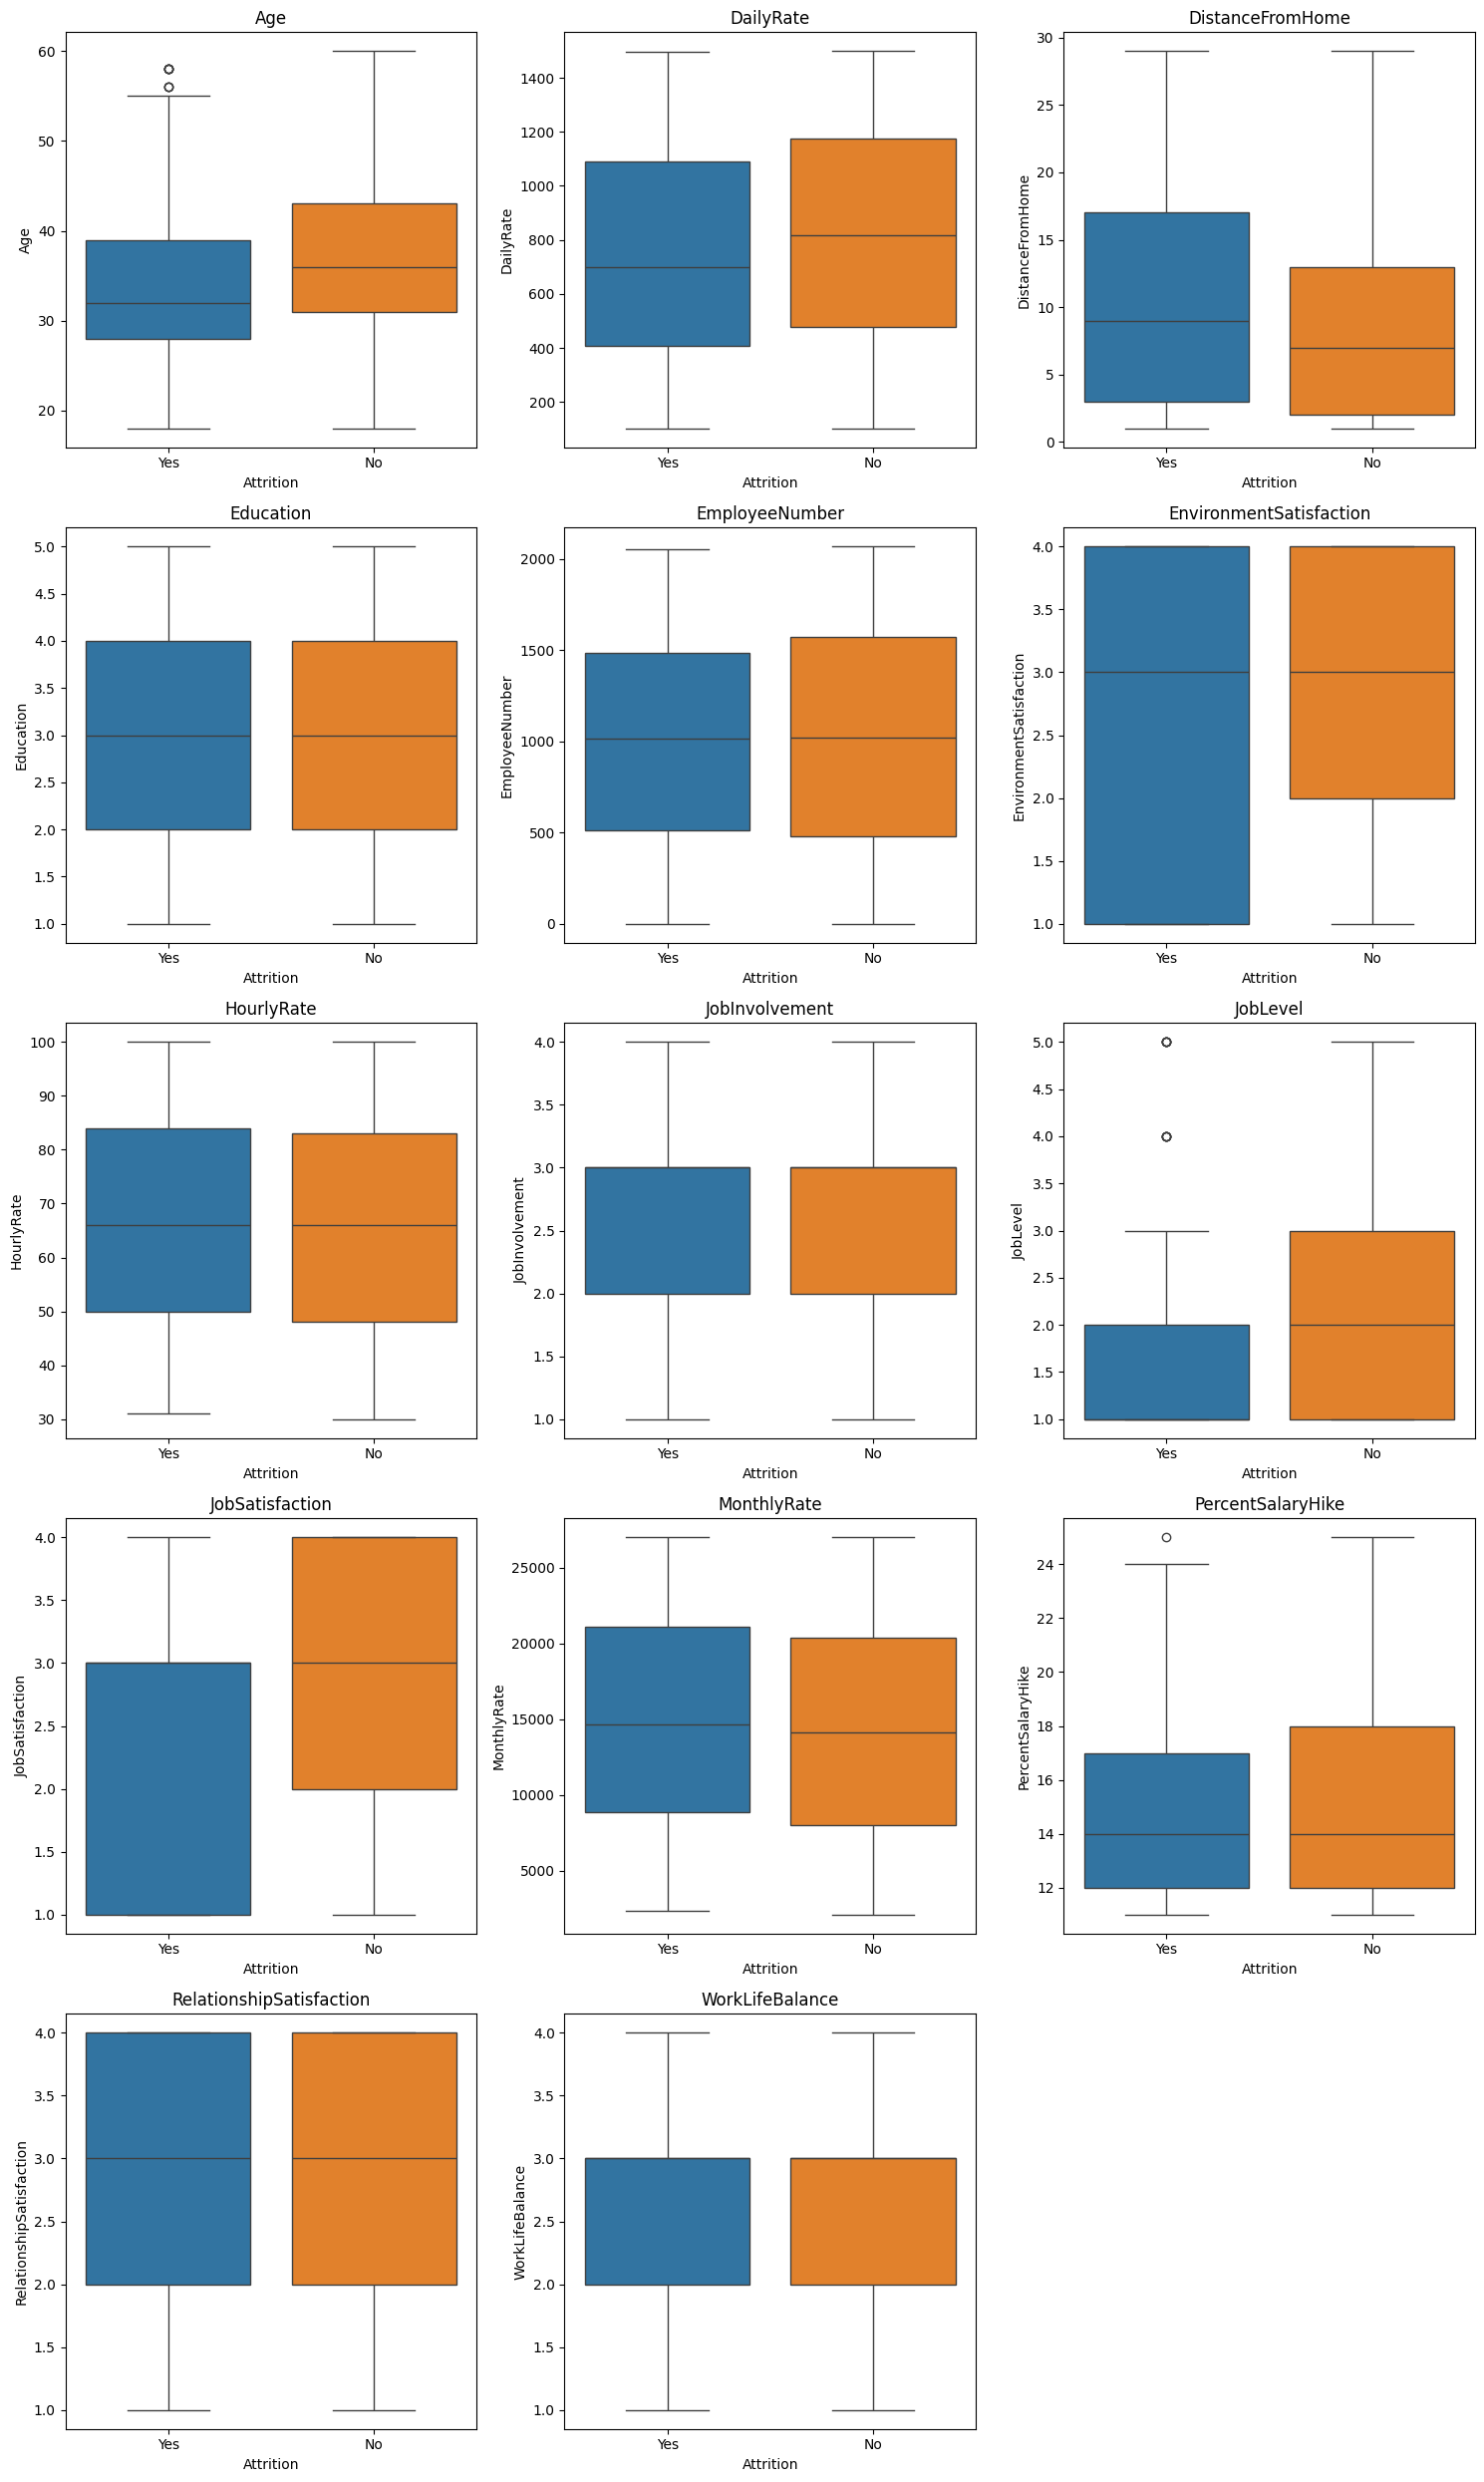

In [16]:
remove_outliers(df)

Les conclusions sur cette analyse exploratoire nous enseigne que le jeu de données est "propre", sans valeurs manquantes. Cependant, nous avons remarqué que les échelles varient entre les variables numériques, comme le montre le tableau descriptif des statistiques, notamment en termes d'écart-type. Cette disparité peut potentiellement affecter la performance du modèle de Machine Learning à créer, donc une standardisation/normalisation des données sera effectuée ultérieurement pour y remédier. Nous avons également constaté une forte corrélation (plus de 90%) entre la variable "Revenu mensuel" et la variable "Grade", ce qui est logique : un niveau hiérarchique plus élevé dans l'entreprise (IBM) est associé à un revenu mensuel plus élevé. Enfin, il est important de noter un déséquilibre significatif entre les employés ayant démissionné et ceux qui ne l'ont pas fait. Le ratio calculé est d'environ 20% (237 démissions sur 1233 employés). Il sera nécessaire de garantir que ce même ratio soit appliqué lors de la division du jeu de données en base d'entraînement et de test.

PREPROCESSING ET MACHINE LEARNING

In [17]:
# Séparation de la variable expliquée Y des variables explicatives X
X = df.drop('Attrition', axis = 1)
y = df['Attrition']

seed = 42

In [18]:
# Séparation des données d'entrainement, de validation et de test
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state = seed, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = seed, stratify = y_temp)

In [19]:
# Dimensions des datasets
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(882, 31) (882,)
(294, 31) (294,)
(294, 31) (294,)


In [20]:
# Distribution des classes
print(y.value_counts(normalize=True).values)
print(y_train.value_counts(normalize=True).values)
print(y_test.value_counts(normalize=True).values)
print(y_val.value_counts(normalize=True).values)

[0.83877551 0.16122449]
[0.83900227 0.16099773]
[0.84013605 0.15986395]
[0.83673469 0.16326531]


MODELISATION - EVALUATIONS ET CHOIX MEILLEUR MODELE

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import time

Metriques pour La Forêt Aléatoire:
              precision    recall  f1-score   support

          No       0.86      0.98      0.92       247
         Yes       0.69      0.19      0.30        47

    accuracy                           0.86       294
   macro avg       0.78      0.59      0.61       294
weighted avg       0.84      0.86      0.82       294



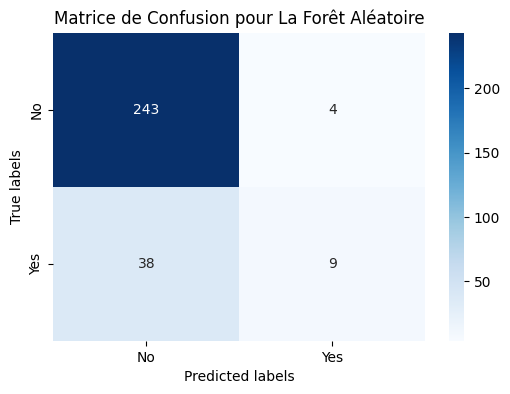

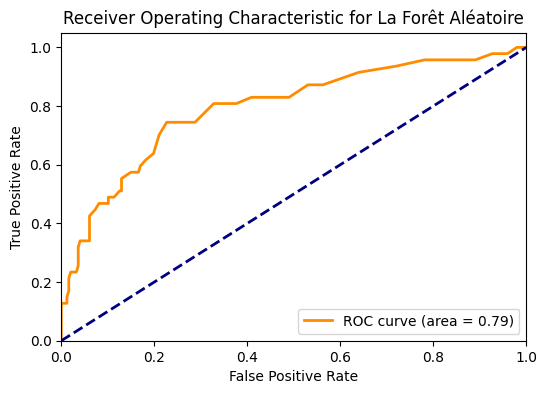

Metriques pour La Regression Logistique:
              precision    recall  f1-score   support

          No       0.91      0.95      0.93       247
         Yes       0.66      0.53      0.59        47

    accuracy                           0.88       294
   macro avg       0.79      0.74      0.76       294
weighted avg       0.87      0.88      0.88       294



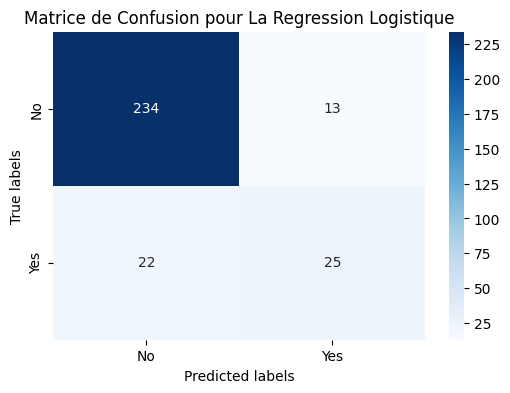

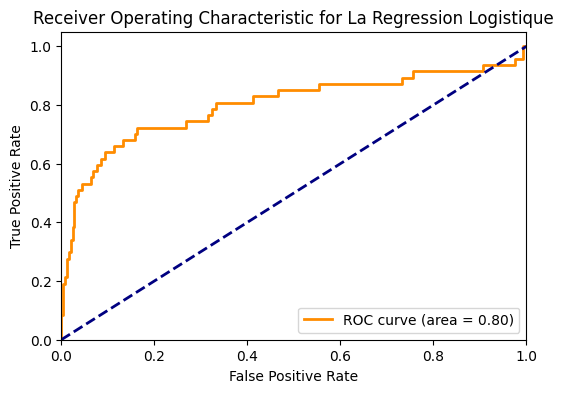

Best Model: La Regression Logistique
------------------------------------
Best Accuracy: 0.8707482993197279
------------------------------------
Best Runtime: 0.7744045257568359


In [22]:
# Appel de la fonction modelling
best_model, model_acc, model_time = modelling(X_train, y_train, X_val, y_val, X_test, y_test, num_vars, cat_vars)

CONCLUSION FINALE

Forêt Aléatoire :

    Precision : La précision pour la classe "No" est de 0.86, ce qui signifie que sur toutes les prédictions de la classe "No", 86% sont correctes. Pour la classe "Yes", la précision est de 0.69, ce qui signifie que sur toutes les prédictions de la classe "Yes", 69% sont correctes.
    Recall : Le rappel pour la classe "No" est de 0.98, ce qui signifie que sur toutes les instances réellement de la classe "No", 98% sont correctement identifiées. Pour la classe "Yes", le rappel est de 0.19, ce qui signifie que seulement 19% des instances réelles de la classe "Yes" sont correctement identifiées.
    F1-score : Le score F1 pour la classe "No" est de 0.92, qui est une moyenne harmonique entre la précision et le rappel. Pour la classe "Yes", le score F1 est de 0.30.
    Accuracy : L'exactitude globale du modèle est de 0.86, ce qui représente la proportion d'instances correctement classées sur l'ensemble des données.
    Area under the curve (AUC) : L'aire sous la courbe ROC est de 0.79, ce qui représente la capacité du modèle à discriminer entre les classes.

Régression Logistique :

    Precision : La précision pour la classe "No" est de 0.91 et pour la classe "Yes" est de 0.66.
    Recall : Le rappel pour la classe "No" est de 0.95 et pour la classe "Yes" est de 0.53.
    F1-score : Le score F1 pour la classe "No" est de 0.93 et pour la classe "Yes" est de 0.59.
    Accuracy : L'exactitude globale du modèle est de 0.88.
    Area under the curve (AUC) : L'aire sous la courbe ROC est de 0.80.

Conclusion :

    La Régression Logistique a de meilleures performances globales avec une précision légèrement plus élevée pour les deux classes, un rappel plus élevé pour la classe "No" et un score F1 globalement plus élevé. De plus, l'aire sous la courbe ROC est également légèrement supérieure pour la Régression Logistique par rapport à la Forêt Aléatoire.
    Par conséquent, sur la base des métriques fournies, la Régression Logistique semble être le meilleur modèle pour ce problème spécifique.